In [1]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from datetime import datetime
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the train-test split data

X_train, X_test, y_train, y_test = joblib.load('/content/drive/MyDrive/train_test_split.joblib')
# X_train, X_test, y_train, y_test = joblib.load('/train_test_split.joblib')

In [4]:
import os
file_path = '/train_test_split.joblib'

if os.path.exists(file_path):
    X_train, X_test, y_train, y_test = joblib.load(file_path)
else:
    print("File not found. Please check the file path.")

File not found. Please check the file path.


In [5]:
#Define the model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [6]:
# Hyperparameter grid
param_dist = {
    'n_estimators':  [100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.4, 0.5]
}

# param_dist = {
#     'n_estimators': [100, 150, 200],          # Lower maximum value to control complexity
#     'max_depth': [4, 6, 8, 10],               # Medium depth for balanced complexity
#     'learning_rate': [0.01, 0.05, 0.1],       # Smaller range with moderate values
#     'subsample': [0.7, 0.8, 0.9],             # Slightly below 1.0 for generalization
#     'colsample_bytree': [0.7, 0.8, 0.9],      # Similar to subsample for controlled feature sampling
#     'gamma': [0, 0.1, 0.2],                   # Lower values to control pruning, avoid aggressive regularization
#     'min_child_weight': [1, 3, 5],            # Range to regulate tree splits
#     'reg_alpha': [0, 0.1, 0.5],               # Mild regularization to reduce overfitting
#     'reg_lambda': [1, 1.5, 2]                 # L2 regularization to handle high variance
# }

In [7]:
#Randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=10, scoring='r2', cv=5, random_state=42)

In [8]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.15, 0.2],
                                        'max_depth': [3, 5, 7, 9, 11, 13],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2')

In [9]:

# Get the best model
best_model = random_search.best_estimator_

In [10]:
# Evaluate the model
y_pred = best_model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
# Save the plot with a timestamp in the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")  # Format: YYYYMMDD_HHMMSS
directory = r"C:\Users\Maryl\OneDrive\Allstate AI\Graphs"
version_folder = os.path.join(directory, f'XGBoost_{timestamp}')
os.makedirs(version_folder)
file_path= os.path.join(version_folder, '{}_XGBoost'.format(timestamp))

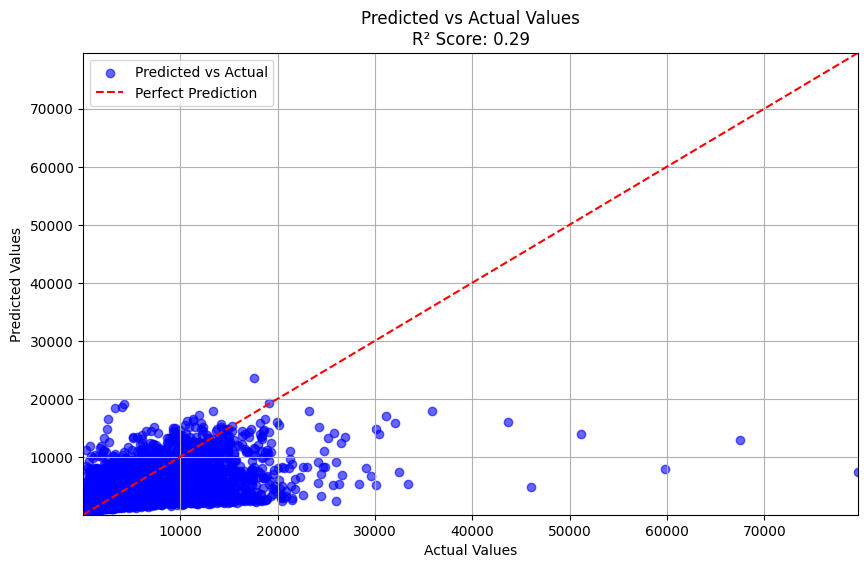

In [13]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')  # Diagonal line
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual Values\nR² Score: {r2:.2f}')
plt.legend()
plt.grid()
plt.savefig(os.path.join(version_folder, '{}_R2_graph.png'.format(timestamp)), transparent = False, dpi = 650, bbox_inches = "tight")



In [14]:
# # Save the plot with a timestamp in the filename
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")  # Format: YYYYMMDD_HHMMSS
# plt.savefig(f'predicted_vs_actual_{timestamp}.png', bbox_inches ="tight")  # Save as PNG
# #plot is not saving, figure out why

In [15]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
plt.show()

Mean Squared Error: 5830129.891466616
R² Score: 0.2854882526002128


RMSE: 2414.5661911545553


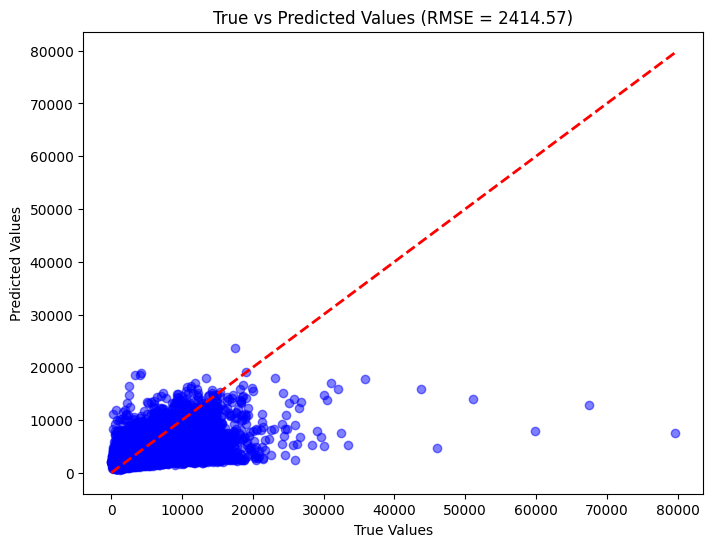

In [16]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Scatter plot for True vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Values (RMSE = {rmse:.2f})")
# plt.savefig(f'predicted_vs_actual_{timestamp}.png', bbox_inches='tight')
plt.savefig(os.path.join(version_folder, '{}_RMSE_plot.png'.format(timestamp)),transparent = False, dpi = 650, bbox_inches = "tight")


plt.show()

Residual Value (preicted value - the actal value): 10168     1276.899941
6936      1545.056875
39511    -3081.992256
40087     1153.201172
117312     701.550449
             ...     
56217     1067.661523
162470     521.024434
114899    2004.930264
127308   -3175.483442
35726      759.633535
Name: loss, Length: 37664, dtype: float64


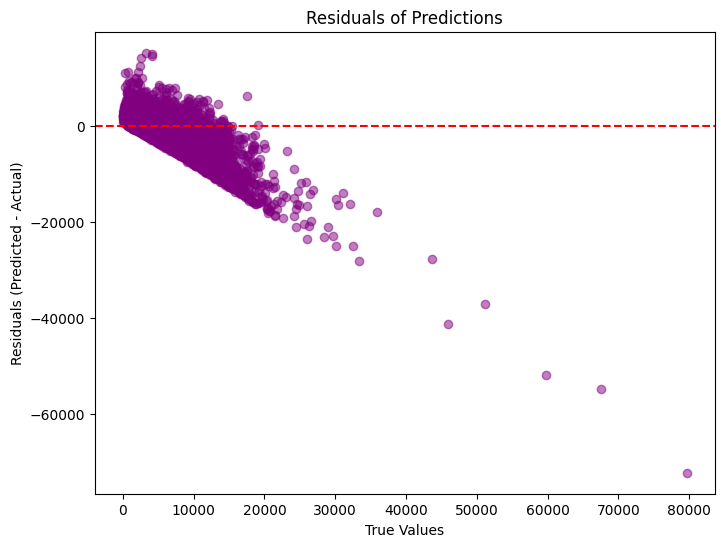

In [17]:
# Calculate residuals
residual = y_pred - y_test
print(f"Residual Value (preicted value - the actal value): {residual}")


# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residual, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Residuals (Predicted - Actual)")
plt.title("Residuals of Predictions")
# plt.savefig(f'residuals_plot_{timestamp}.png', bbox_inches='tight')
plt.savefig(os.path.join(version_folder, '{}_residuals_plot_'.format(timestamp)), transparent = False, dpi = 650, bbox_inches = "tight")
plt.show()